# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

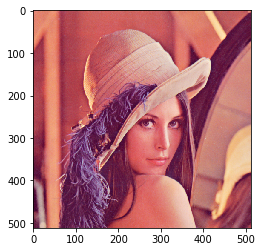

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

IMG_FILE = "Part01/lena.png"


# 以彩色圖片的方式載入
img = cv2.imread(IMG_FILE, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

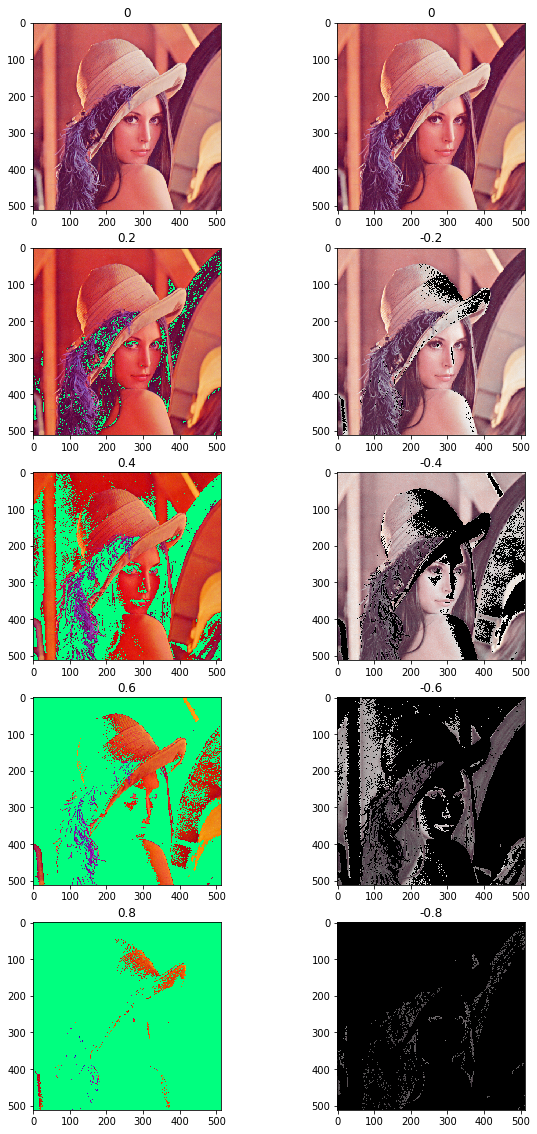

In [74]:
def convert_saturation(img, change_percentage=0.2):
    # 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   
    img_hsv = img_hsv.astype("float32")
    img_hsv[:,:,1]= img_hsv[:,:,1] + (255*change_percentage)
    # 針對飽和度的值做改變，超過界線的都會 bound
    img_hsv[img_hsv[:,:,1] >255] =255
    img_hsv[img_hsv[:,:,1] <0] =0
    img_hsv = img_hsv.astype("uint8")   
    # 轉換 color space 回 RGB
    img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    return img_rgb


plt.figure(figsize=(10,20))
for i, change_percentage in enumerate([0,0, 0.2,-0.2, 0.4,-0.4, 0.6,-0.6,0.8,-0.8]):           
    im_changed = convert_saturation(img, change_percentage)
    plt.subplot(5,2,i+1)
    plt.imshow(im_changed)
    plt.title(change_percentage)
    

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

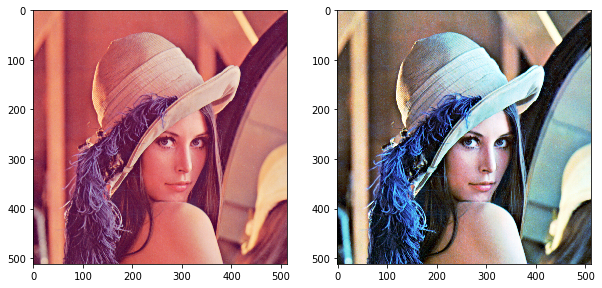

In [115]:
# case 1
# 每個 channel 個別做直方圖均衡
b, g, r = cv2.split(img)

eaualizeHist_b = cv2.equalizeHist(b)
eaualizeHist_g = cv2.equalizeHist(g)
eaualizeHist_r = cv2.equalizeHist(r)

# 組合經過直方圖均衡的每個 channel
eaualizeHist_img = cv2.merge((eaualizeHist_r,eaualizeHist_g,eaualizeHist_b))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(eaualizeHist_img)


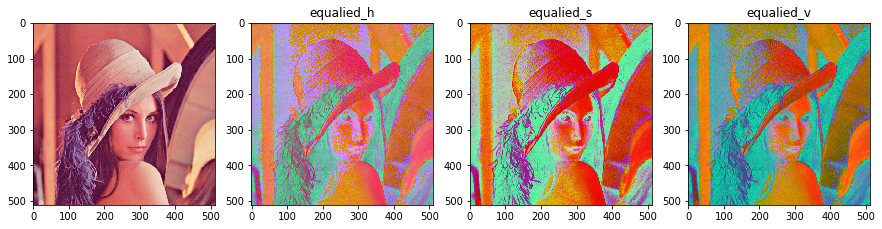

In [111]:
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)

equalied_h = cv2.equalizeHist(h)
equalied_s = cv2.equalizeHist(s)
equalied_v = cv2.equalizeHist(v)

img_equalied_h = cv2.merge((equalied_h,s,v))
img_equalied_s = cv2.merge((h,equalied_s,v))
img_equalied_v = cv2.merge((h,s,equalied_v))

plt.figure(figsize=(15,20))
plt.subplot(141)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(142)
plt.title("equalied_h")
plt.imshow(cv2.cvtColor(img_equalied_h, cv2.COLOR_BGR2RGB))

plt.subplot(143)
plt.title("equalied_s")
plt.imshow(cv2.cvtColor(img_equalied_s, cv2.COLOR_BGR2RGB))

plt.subplot(144)
plt.title("equalied_v")
plt.imshow(cv2.cvtColor(img_equalied_v, cv2.COLOR_BGR2RGB))



## 調整對比 / 明亮

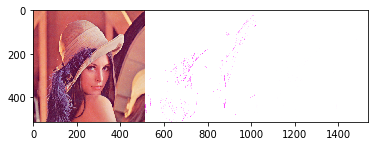

In [96]:
# alpha: 控制對比度 (1.0~3.0), 預設值=1.0
# beta: 控制明亮度 (0~255), 預設值 = 0
add_contrast = cv2.convertScaleAbs(img, alpha=15.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1, beta=245)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))

plt.imshow(cv2.cvtColor(img_contrast_light, cv2.COLOR_BGR2RGB))
